# In this notebook, I oversampled the dataset to make it a balanced dataset, after that, I followed the modelling notebook to test the balanced dataset, which improved the overall f1_score. RandomforestClassifier has the highest value.     Also, I tried removing some columns due to their correlation value with the target feature (CDR) but all model but one, tested with it gave lower f1_score compared to the baseline I got when I used all available features. The one with better F1 score had the male column removed and the algorithm used was randomforestclassifier

# Step 2 - Feature Engineering

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [48]:
df.shape

(373, 15)

#### ENCODING CATEGORICAL DATA

#### Two categorical columns: M/F and Group.

In [49]:
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder.
ohe = OneHotEncoder()

# Perform OneHotEncoding on the Group column.
df_ohe1 = pd.DataFrame(ohe.fit_transform(df[['Group']]).toarray(), columns=ohe.categories_)

# Merge OneHotEncoded column with df dataframe.
df2 = df.join(df_ohe1)

# View dataframe.
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)"
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0


In [50]:
# Perform OneHotEncoding on the M/F column.
df_ohe2 = pd.DataFrame(ohe.fit_transform(df[['M/F']]).toarray(), columns=ohe.categories_)

# Merge OneHotEncoded column with dataframe.
df_final = df2.join(df_ohe2)

# View final dataframe.
df_final

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0.0,0.0,1.0,0.0,1.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0.0,0.0,1.0,0.0,1.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0.0,1.0,0.0,0.0,1.0
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0.0,1.0,0.0,0.0,1.0
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,0.0,1.0,0.0,0.0,1.0
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,0.0,1.0,0.0,0.0,1.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [51]:
df = df_final

#### We can decide to drop the Group and M/F columns since they have been encoded.

In [34]:
# df.drop(['Group', 'M/F'], axis=1, inplace=True)
# df

# Oversampling

In [60]:
#oversampling
class_count_0, class_count_1,class_count_3, class_count_4 = df['CDR'].value_counts()

In [58]:
class_0 = df[df['CDR']== 0.0]
class_1 = df[df['CDR']== 0.5]
class_2 = df[df['CDR']== 1.0]
class_3 = df[df['CDR']== 2.0]

In [59]:
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)

class 0: (206, 20)
class 1: (123, 20)
class 2: (41, 20)
class 3: (3, 20)


In [ ]:
#oversampling
class_1 = df[df['CDR']== 0.0]
class_2 = df[df['CDR']== 1.0]
class_1_over = class_1.sample(class_count_0, replace=True)
class_2_over = class_2.sample(class_count_0, replace=True)
class_count_0, class_count_1 = df['Success'].value_counts()

test_over = pd.concat([class_1_over, class_2_over, ], axis=0)


In [62]:
class_1_over = class_1.sample(class_count_0, replace=True)
class_2_over = class_2.sample(class_count_0, replace=True)
class_3_over = class_3.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_2_over, class_3_over, class_0], axis=0)




In [68]:
print("total class of 1, 2, 3  and 0:",test_over['CDR'].value_counts())# plot the count after under-sampeling

total class of 1, 2, 3  and 0: 0.5    206
1.0    206
2.0    206
0.0    206
Name: CDR, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

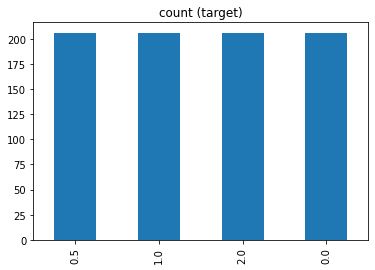

In [63]:
test_over['CDR'].value_counts().plot(kind='bar', title='count (target)')

In [69]:
test_over

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
285,OAS2_0140,OAS2_0140_MR1,Demented,1,0,F,R,76,16,3.0,26.0,0.5,1391,0.705,1.262,0.0,1.0,0.0,1.0,0.0
298,OAS2_0145,OAS2_0145_MR2,Converted,2,1707,F,R,73,16,3.0,29.0,0.5,1287,0.771,1.364,1.0,0.0,0.0,1.0,0.0
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234,1.0,0.0,0.0,1.0,0.0
205,OAS2_0098,OAS2_0098_MR1,Demented,1,0,M,R,66,12,4.0,30.0,0.5,1446,0.780,1.214,0.0,1.0,0.0,0.0,1.0
93,OAS2_0046,OAS2_0046_MR1,Demented,1,0,F,R,83,15,2.0,20.0,0.5,1476,0.750,1.189,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165,0.0,0.0,1.0,1.0,0.0
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162,0.0,0.0,1.0,1.0,0.0
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


In [70]:
df1=test_over.copy()

In [72]:
df1.reset_index()

,index,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,...,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
0,285,OAS2_0140,OAS2_0140_MR1,Demented,1,0,F,R,76,16,...,26.0,0.5,1391,0.705,1.262,0.0,1.0,0.0,1.0,0.0
1,298,OAS2_0145,OAS2_0145_MR2,Converted,2,1707,F,R,73,16,...,29.0,0.5,1287,0.771,1.364,1.0,0.0,0.0,1.0,0.0
2,35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,...,27.0,0.5,1423,0.696,1.234,1.0,0.0,0.0,1.0,0.0
3,205,OAS2_0098,OAS2_0098_MR1,Demented,1,0,M,R,66,12,...,30.0,0.5,1446,0.780,1.214,0.0,1.0,0.0,0.0,1.0
4,93,OAS2_0046,OAS2_0046_MR1,Demented,1,0,F,R,83,15,...,20.0,0.5,1476,0.750,1.189,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,...,30.0,0.0,1506,0.740,1.165,0.0,0.0,1.0,1.0,0.0
820,364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,...,30.0,0.0,1510,0.723,1.162,0.0,0.0,1.0,1.0,0.0
821,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,...,30.0,0.0,1319,0.801,1.331,0.0,0.0,1.0,1.0,0.0
822,371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,...,30.0,0.0,1327,0.796,1.323,0.0,0.0,1.0,1.0,0.0


For __Feature Engineering__ the __Train data__ should only be taken into consideration for the statistics value and 

then these values will be then used for both train and test. This is the best and optimal way to prevent the 

overfitting later in Model Building part.

In [74]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df1.drop('CDR' , axis=1) , df1['CDR'] , test_size=0.3 , 
                                                      random_state=2)

In [75]:
X_train.shape , X_test.shape

((576, 19), (248, 19))

### 1) Missing Value Imputation
- by Median Imputation method

In [76]:
missing_variables = [feature for feature in df.columns if df[feature].isnull().sum()>0]
X_train[missing_variables].isnull().mean()

SES     0.065972
MMSE    0.013889
dtype: float64

So SES has 5% of missing values and MMSE has .05% of missign values

In [77]:
median_SES = X_train['SES'].median()
X_train['SES_imputed'] = X_train['SES'].fillna(median_SES)
X_test['SES_imputed'] = X_test['SES'].fillna(median_SES)

In [78]:
median_MMSE = df['MMSE'].median()
X_train['MMSE_imputed'] = df['MMSE'].fillna(median_MMSE)
X_test['MMSE_imputed'] = X_test['MMSE'].fillna(median_SES)

2 New variables Created for the analysis and it later will be removed

In [79]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,...,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,...,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,...,1423,0.696,1.234,1.0,0.0,0.0,1.0,0.0,1.0,27.0
173,OAS2_0079,OAS2_0079_MR3,Demented,3,1435,F,R,73,12,4.0,...,1478,0.696,1.188,0.0,1.0,0.0,1.0,0.0,4.0,16.0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,...,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,...,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0


In [80]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,...,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,...,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0
174,OAS2_0080,OAS2_0080_MR1,Demented,1,0,M,R,66,15,2.0,...,1548,0.727,1.134,0.0,1.0,0.0,0.0,1.0,2.0,25.0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,...,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,...,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,...,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0


__Cheking out the distribution after imputation__

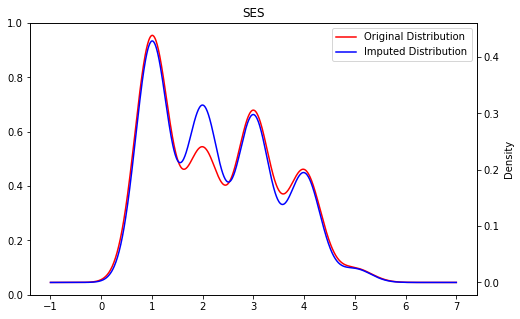

In [81]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['SES'].plot.density(color='red' , label='Original Distribution')

X_train['SES_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('SES')
plt.show()

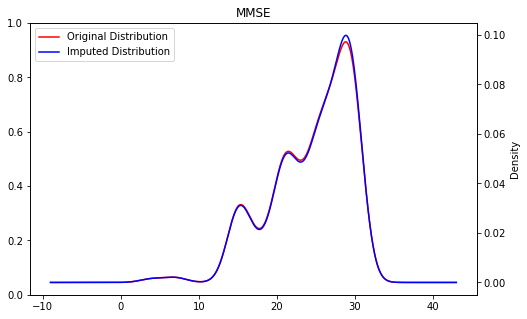

In [82]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['MMSE'].plot.density(color='red' , label='Original Distribution')

X_train['MMSE_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('MMSE')
plt.show()

We can see the there is the distortion of the original varible distribution in Variable `SSE` as the missing data is 5%.

But not in the `MMSE` variable

__Variance__

In [83]:
X_train['SES'].var() , X_train['SES_imputed'].var()  
# so we can also see the change in the variance

(1.3895315431316755, 1.3024999999999978)

In [84]:
X_train['MMSE'].var() , X_train['MMSE_imputed'].var()  
# almost same 

(26.937001639466384, 26.858837560386338)

__Covariance__

In [85]:
X_train.cov()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed
Visit,0.675060,377.463001,0.568527,0.210236,-0.099292,-0.692376,7.312277,-0.004914,-0.006254,0.018829,-0.024553,0.005725,-0.030580,0.030580,-0.098949,-0.627711
MR Delay,377.463001,266125.094127,920.413901,154.694085,-51.888573,-67.550895,5648.299635,-2.753542,-4.983217,16.914885,-39.220139,22.305254,3.443406,-3.443406,-49.455888,-40.075830
Age,0.568527,920.413901,75.300821,3.408514,-2.600168,-1.634846,-32.574505,-0.158223,-0.004101,0.059541,0.263792,-0.323333,1.083188,-1.083188,-2.385290,-1.758104
EDUC,0.210236,154.694085,3.408514,8.744755,-2.740954,1.372044,226.834085,0.015674,-0.172599,0.033714,-0.042083,0.008370,-0.335000,0.335000,-2.522663,1.161241
SES,-0.099292,-51.888573,-2.600168,-2.740954,1.389532,-0.658117,-87.314608,-0.001497,0.067095,-0.058836,0.017501,0.041335,0.057264,-0.057264,1.389532,-0.658117
MMSE,-0.692376,-67.550895,-1.634846,1.372044,-0.658117,26.937002,36.830964,0.087334,-0.012292,0.299271,-1.422293,1.123022,-0.184316,0.184316,-0.653532,26.937002
eTIV,7.312277,5648.299635,-32.574505,226.834085,-87.314608,36.830964,28406.882533,0.296870,-21.918960,-0.851492,2.499281,-1.647790,-46.836594,46.836594,-79.782844,14.184749
nWBV,-0.004914,-2.753542,-0.158223,0.015674,-0.001497,0.087334,0.296870,0.001330,-0.000073,0.000199,-0.005503,0.005304,-0.001297,0.001297,-0.001537,0.087326
ASF,-0.006254,-4.983217,-0.004101,-0.172599,0.067095,-0.012292,-21.918960,-0.000073,0.017296,0.000361,-0.002293,0.001932,0.035242,-0.035242,0.061076,0.009211
"(Converted,)",0.018829,16.914885,0.059541,0.033714,-0.058836,0.299271,-0.851492,0.000199,0.000361,0.061727,-0.046582,-0.015145,0.000725,-0.000725,-0.053732,0.290839


We can see that Variable covariance is also changed for the `SES` variable but for the `MMSE` is almost same there is no change

So after all the inferences derived after the imputation . We come to a conclusion to make the additional missing indicator for the variable `SES`

In [86]:
# 1 for missing and 0 for not missing

X_train['missing_indicator_SES'] = np.where(X_train['SES'].isnull() , 1 , 0)  
X_test['missing_indicator_SES'] = np.where(X_test['SES'].isnull() , 1 , 0)

In [87]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,...,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,...,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0,0
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,...,0.696,1.234,1.0,0.0,0.0,1.0,0.0,1.0,27.0,0
173,OAS2_0079,OAS2_0079_MR3,Demented,3,1435,F,R,73,12,4.0,...,0.696,1.188,0.0,1.0,0.0,1.0,0.0,4.0,16.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,...,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,3.0,...,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0


In [88]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,...,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,...,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
174,OAS2_0080,OAS2_0080_MR1,Demented,1,0,M,R,66,15,2.0,...,0.727,1.134,0.0,1.0,0.0,0.0,1.0,2.0,25.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1.0,...,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,...,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1.0,...,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0


In [89]:
X_train.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)
X_test.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)

In [90]:
X_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,1272,0.698,1.380,0.0,0.0,1.0,1.0,0.0,2.0,30.0,0
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1423,0.696,1.234,1.0,0.0,0.0,1.0,0.0,1.0,27.0,0
173,OAS2_0079,OAS2_0079_MR3,Demented,3,1435,F,R,73,12,1478,0.696,1.188,0.0,1.0,0.0,1.0,0.0,4.0,16.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
251,OAS2_0120,OAS2_0120_MR2,Demented,2,595,F,R,78,14,1401,0.700,1.253,0.0,1.0,0.0,1.0,0.0,3.0,15.0,0


In [91]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
174,OAS2_0080,OAS2_0080_MR1,Demented,1,0,M,R,66,15,1548,0.727,1.134,0.0,1.0,0.0,0.0,1.0,2.0,25.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0


In [92]:
X_train.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
(Converted,)             0
(Demented,)              0
(Nondemented,)           0
(F,)                     0
(M,)                     0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

In [93]:
X_test.isnull().sum()

Subject ID               0
MRI ID                   0
Group                    0
Visit                    0
MR Delay                 0
M/F                      0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
(Converted,)             0
(Demented,)              0
(Nondemented,)           0
(F,)                     0
(M,)                     0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

__So there are now no missing data in the dataset__

In [94]:
y_test

330    2.0
174    0.5
330    2.0
184    2.0
184    2.0
      ... 
233    0.5
245    0.0
80     0.5
75     0.5
99     1.0
Name: CDR, Length: 248, dtype: float64

In [95]:
X_test.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)",SES_imputed,MMSE_imputed,missing_indicator_SES
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
174,OAS2_0080,OAS2_0080_MR1,Demented,1,0,M,R,66,15,1548,0.727,1.134,0.0,1.0,0.0,0.0,1.0,2.0,25.0,0
330,OAS2_0164,OAS2_0164_MR2,Demented,2,580,M,R,79,20,1710,0.760,1.026,0.0,1.0,0.0,0.0,1.0,1.0,25.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0
184,OAS2_0087,OAS2_0087_MR2,Demented,2,754,F,R,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,0.0,1.0,21.0,0


In [96]:
# We changed the 4 class to 0,1,2,an 3 so that the model don't see it as a continous value
y_test=y_test.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')
y_train=y_train.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')

In [97]:
# We drop the columns that are not useful to the model
X_train.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)
X_test.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)

In [102]:
X_train.drop(['Group'], axis=1, inplace=True)
X_test.drop(['Group'], axis=1, inplace=True)

In [105]:
X_train.drop(['M/F'], axis=1, inplace=True)
X_test.drop(['M/F'], axis=1, inplace=True)

In [32]:
# We can use this binary classification to predict the probability of 
# a patient have dementia

# def proba(n):
#     if n == 0:
#         return 0
#     else:
#         return 1


# df['yy'] = df['CDR'].apply(lambda x: proba(x))

## Modeling

In [106]:
from sklearn.metrics import f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
base_model = LogisticRegression()
base_model.fit(X_train,y_train)

print(f1_score(y_test,base_model.predict(X_test), average='weighted'))

0.6427542463753521


C:\Users\drogu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
print(classification_report(y_test, base_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        60
           1       0.53      0.30      0.38        63
           2       0.72      0.55      0.63        56
           3       0.73      1.00      0.84        69

    accuracy                           0.67       248
   macro avg       0.65      0.66      0.64       248
weighted avg       0.65      0.67      0.64       248



In [109]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train,y_train)

print(f1_score(y_test,gbt.predict(X_test), average='weighted'))

0.9504016284206876


In [110]:
print(classification_report(y_test, gbt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.81      0.89        63
           2       0.88      1.00      0.93        56
           3       1.00      1.00      1.00        69

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.96      0.95      0.95       248



In [111]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train,y_train)

print(f1_score(y_test,rfc.predict(X_test), average='weighted'))

0.9671866742161116


In [112]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.87      0.93        63
           2       0.93      1.00      0.97        56
           3       1.00      1.00      1.00        69

    accuracy                           0.97       248
   macro avg       0.97      0.97      0.97       248
weighted avg       0.97      0.97      0.97       248



In [113]:
dtc = DecisionTreeClassifier(max_depth=3,random_state = 7)

dtc.fit(X_train,y_train)

print(f1_score(y_test,dtc.predict(X_test), average='weighted'))

0.7665480183452421


In [114]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.63      0.81      0.71        63
           2       0.86      0.34      0.49        56
           3       0.78      1.00      0.87        69

    accuracy                           0.79       248
   macro avg       0.82      0.77      0.76       248
weighted avg       0.81      0.79      0.77       248



In [115]:
#Function for creating a dataframe based on order of importance of features
def feat_imp_sorter(model, x):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    feature_imp = pd.DataFrame(zip(model.feature_importances_,x.columns), columns=['Value','Features'])
    feature_imp.sort_values(by='Value',ignore_index=True, ascending=False, inplace = True)
    return feature_imp
    
#fUnction for ploting barplot for the feature importance of any model    
def feat_imp_ploter(model,x):
    sorted_feat = feat_imp_sorter(model,x)
#     print(sorted_feat.shape)
    
    plt.figure(figsize=(5, 5))
    sns.barplot(x="Value", y="Features", data=sorted_feat)
    plt.title(str(model) +'Features_important')
    plt.tight_layout()

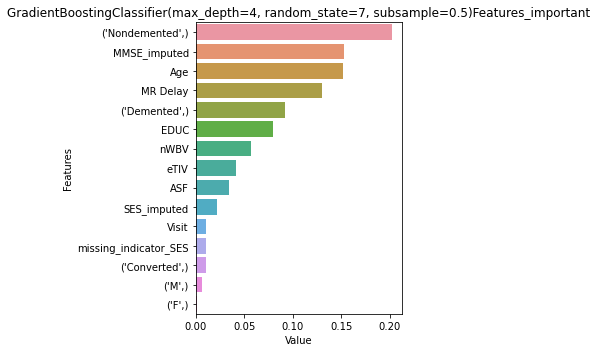

In [117]:
import warnings
feat_imp_ploter(gbt, X_train)

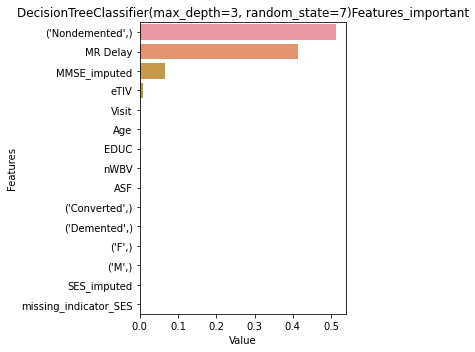

In [118]:
feat_imp_ploter(dtc, X_train)

In [124]:
corr= df1.corr()
corr

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)","(F,)","(M,)"
Visit,1.000000,0.884413,0.076621,0.060115,-0.085840,-0.167772,0.067809,0.086722,-0.149145,-0.088161,0.072986,-0.060870,0.024290,-0.102339,0.102339
MR Delay,0.884413,1.000000,0.197865,0.062174,-0.041647,-0.015853,0.010116,0.074942,-0.120843,-0.080533,0.150238,-0.172163,0.100552,-0.007300,0.007300
Age,0.076621,0.197865,1.000000,0.137312,-0.257761,-0.046059,0.325060,-0.005635,-0.520650,-0.020272,0.020217,0.093537,-0.112355,0.258054,-0.258054
EDUC,0.060115,0.062174,0.137312,1.000000,-0.786467,0.094312,0.273354,0.442608,0.146704,-0.427624,0.049077,-0.053254,0.029627,-0.202521,0.202521
SES,-0.085840,-0.041647,-0.257761,-0.786467,1.000000,-0.095814,-0.245367,-0.436767,-0.017752,0.434198,-0.134383,0.019135,0.056221,0.107533,-0.107533
MMSE,-0.167772,-0.015853,-0.046059,0.094312,-0.095814,1.000000,-0.645879,0.021128,0.458965,0.003358,0.215487,-0.599028,0.523397,-0.077362,0.077362
CDR,0.067809,0.010116,0.325060,0.273354,-0.245367,-0.645879,1.000000,0.121447,-0.322402,-0.144679,-0.190750,0.697110,-0.643837,0.046592,-0.046592
eTIV,0.086722,0.074942,-0.005635,0.442608,-0.436767,0.021128,0.121447,1.000000,0.032376,-0.989556,-0.051772,0.040283,-0.014108,-0.566526,0.566526
nWBV,-0.149145,-0.120843,-0.520650,0.146704,-0.017752,0.458965,-0.322402,0.032376,1.000000,0.000099,0.044577,-0.345510,0.347427,-0.089283,0.089283
ASF,-0.088161,-0.080533,-0.020272,-0.427624,0.434198,0.003358,-0.144679,-0.989556,0.000099,1.000000,0.046203,-0.050775,0.028581,0.547260,-0.547260


<AxesSubplot:>

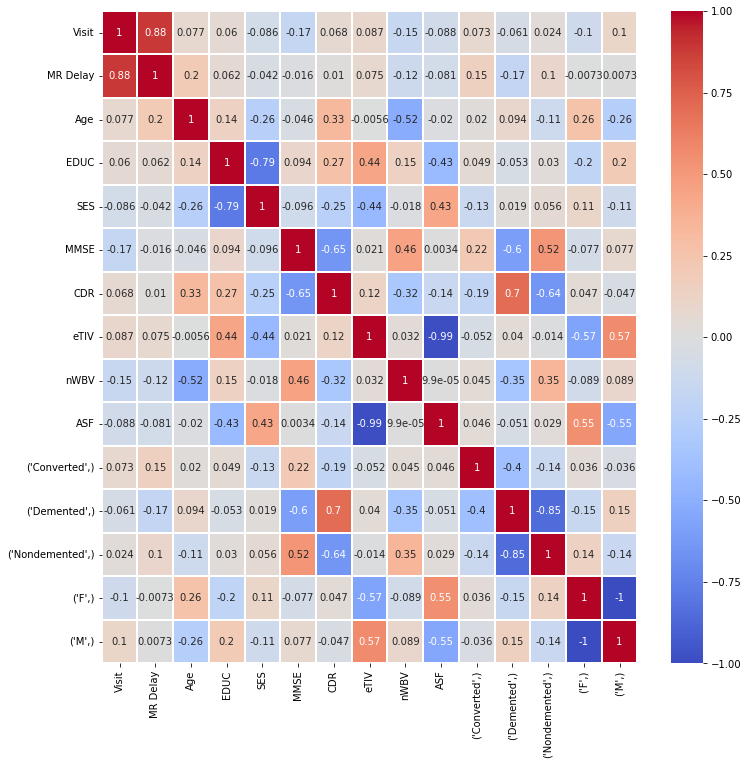

In [125]:

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,cmap='coolwarm',linewidths=2.0, annot=True)

In [139]:
#From the correlation chart, dropping features with absolute values less than 1 as compared with the target column (CDR).
abs(corr['CDR'])>0.1

Visit             False
MR Delay          False
Age                True
EDUC               True
SES                True
MMSE               True
CDR                True
eTIV               True
nWBV               True
ASF                True
(Converted,)       True
(Demented,)        True
(Nondemented,)     True
(F,)              False
(M,)              False
Name: CDR, dtype: bool

In [164]:
#To remove Visit, MR Delay, (F,), (M,)
idx_to_delete = [0,1,10, 11]
indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [165]:
X_train2= X_train.iloc[:, indices]
X_test2= X_test.iloc[:, indices]

In [166]:
X_train2

,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)",SES_imputed,MMSE_imputed,missing_indicator_SES
13,93,14,1272,0.698,1.380,0.0,0.0,1.0,2.0,30.0,0
35,92,14,1423,0.696,1.234,1.0,0.0,0.0,1.0,27.0,0
173,73,12,1478,0.696,1.188,0.0,1.0,0.0,4.0,16.0,0
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0
251,78,14,1401,0.700,1.253,0.0,1.0,0.0,3.0,15.0,0


In [167]:
X_test2

,Age,EDUC,eTIV,nWBV,ASF,"(Converted,)","(Demented,)","(Nondemented,)",SES_imputed,MMSE_imputed,missing_indicator_SES
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
174,66,15,1548,0.727,1.134,0.0,1.0,0.0,2.0,25.0,0
330,79,20,1710,0.760,1.026,0.0,1.0,0.0,1.0,25.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
184,98,17,1503,0.660,1.168,0.0,1.0,0.0,1.0,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...
233,76,12,1315,0.698,1.335,0.0,1.0,0.0,3.0,27.0,0
245,67,14,1508,0.794,1.164,1.0,0.0,0.0,4.0,30.0,0
80,88,6,1348,0.713,1.302,0.0,1.0,0.0,4.0,23.0,0
75,89,12,1485,0.706,1.181,0.0,1.0,0.0,4.0,26.0,0


In [168]:
y_train2 = y_train.copy()
y_test2 = y_test.copy()

In [169]:
base_model = LogisticRegression()
base_model.fit(X_train2,y_train2)

print(f1_score(y_test2,base_model.predict(X_test2), average='weighted'))

0.6349759075174051


C:\Users\drogu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
print(classification_report(y_test2, base_model.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        60
           1       0.53      0.41      0.46        63
           2       0.77      0.41      0.53        56
           3       0.71      1.00      0.83        69

    accuracy                           0.66       248
   macro avg       0.66      0.64      0.63       248
weighted avg       0.66      0.66      0.63       248



In [172]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train2,y_train2)

print(f1_score(y_test2,gbt.predict(X_test2), average='weighted'))

0.9174697220311487


In [173]:
#To remove  (F,), (M,)
idx_to_delete = [10, 11]
indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [174]:
X_train3= X_train.iloc[:, indices]
X_test3= X_test.iloc[:, indices]

In [175]:
y_train3 = y_train.copy()
y_test3 = y_test.copy()

In [176]:
base_model = LogisticRegression()
base_model.fit(X_train3,y_train3)

print(f1_score(y_test3,base_model.predict(X_test3), average='weighted'))

0.5577891996699528


C:\Users\drogu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train3,y_train3)

print(f1_score(y_test3,gbt.predict(X_test3), average='weighted'))

0.9461751583153808


In [178]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train3,y_train3)

print(f1_score(y_test3,rfc.predict(X_test3), average='weighted'))

0.9587733996938669


In [184]:
#To remove  (M,)
idx_to_delete = [ 11]
indices2 = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]

In [185]:
X_train4= X_train.iloc[:, indices2]
X_test4= X_test.iloc[:, indices2]

In [186]:
y_train4 = y_train.copy()
y_test4 = y_test.copy()

In [187]:
base_model = LogisticRegression()
base_model.fit(X_train4,y_train4)

print(f1_score(y_test4,base_model.predict(X_test4), average='weighted'))

0.5865209891464781


C:\Users\drogu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train4,y_train4)

print(f1_score(y_test4,gbt.predict(X_test4), average='weighted'))

0.9461751583153808


In [196]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=10,random_state = 3)
rfc.fit(X_train4,y_train4)

print(f1_score(y_test4,rfc.predict(X_test4), average='weighted'))

0.9713696311699752


# This gave better F1_score